# Análisis de LCS

## Importando bibliotecas
- <b>Pandas</b>: Nos sirve para leer datos y filtrarlos.
- <b>Seaborn</b>: Es una biblioteca para graficar que nos permite interactuar con datos de Pandas.

- <i>Numpy y Matplotlib son dependencias de Pandas.</i>


In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Leyendo datos de la experimentación con Pandas
Pandas maneja DataFrames, una especie de tablas, donde guarda todos los datos.<br />
En general para experimentos simples se puede tener una tabla donde para cada combinación de variables se tenga
un resultado en cada columna.<br />
Estas tablas las puede generar la experimentación en CPP en formato CSV por ejemplo.

In [15]:
df = pd.read_csv("lcs.csv")
print(df)

    instancia     n     m         TD         BU
0           0   100   100   0.880939   0.391243
1           1   100   200   1.634080   0.774585
2           2   100   300   2.183770   1.223150
3           3   100   400   2.621560   1.539470
4           4   100   500   3.415090   1.934090
5           5   100   600   5.234760   2.250240
6           6   100   700   5.191930   2.633480
7           7   100   800   6.021970   3.123800
8           8   100   900   7.304630   3.816310
9           9   100  1000   7.346260   4.128250
10         10   200   100   1.470400   0.980393
11         11   200   200   3.092420   1.523910
12         12   200   300   3.850630   2.342940
13         13   200   400   5.680720   3.304930
14         14   200   500   6.940810   3.744520
15         15   200   600   8.848990   4.746870
16         16   200   700  10.065400   5.360290
17         17   200   800  12.222600   6.088340
18         18   200   900  12.971500   7.208660
19         19   200  1000  14.895700   8

## Gráfico en 3D
<i>No es buena idea en general porque no permite visualizar lo que se quiere transmitir de manera sencilla.</i>

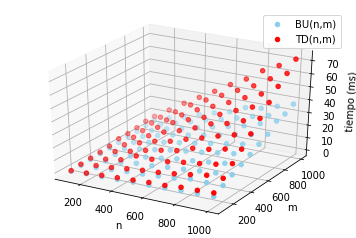

In [16]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['n'], df['m'], df['BU'], c='skyblue', s=20)
ax.scatter(df['n'], df['m'], df['TD'], c='red', s=20)
ax.legend(["BU(n,m)", "TD(n,m)"])
ax.set_xlabel("n")
ax.set_ylabel("m")
ax.set_zlabel("tiempo (ms)")
plt.show()

## Heatmap
En este gráfico podemos ver el tiempo en función de las variables m y n en el tamaño de los puntos.
- Pro: Muestra todas las combinaciones de dos variables en un mismo gráfico.
- Pro: Da una idea de cómo es la relación de los tiempos en función de las variables.
- Con: No es tan fácil ver la función de tiempo.
- Con: Solo un algoritmo en el gráfico.

In [14]:
heat_df = df.pivot("n", "m", "TD");
ax = sns.heatmap(heat_df)
ax.invert_yaxis()

NameError: name 'df' is not defined

## Gráfico de lineas con más de una serie
Cuando queremos mostrar cómo se comporta una función con dos variables se puede graficarla en función de una variable varias veces tomando ciertos valores representativos de la segunda.

A continuación graficamos el tiempo del algoritmo BU en función de n. Esto lo hacemos para algunos valores de m.
Vemos que a medida que n crece, si fijamos m la función parece crecer linealmente. A su vez, mientras crece m pareciera que la pendiente de la función crece linealmente también.

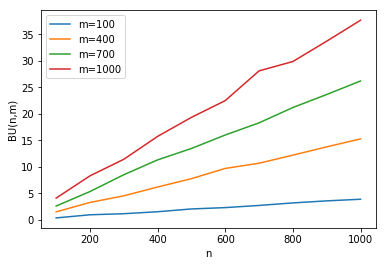

In [126]:
# Graficamos el tiempo de BU en función de n, con series variando m.
ax1 = sns.lineplot(x="n", y="BU", data=df.loc[df['m'] == 100]);
ax1 = sns.lineplot(x="n", y="BU", data=df.loc[df['m'] == 400]);
ax1 = sns.lineplot(x="n", y="BU", data=df.loc[df['m'] == 700]);
ax1 = sns.lineplot(x="n", y="BU", data=df.loc[df['m'] == 1000]);
ax1.legend(["m=100", "m=400", "m=700", "m=1000"]);
plt.ylabel("BU(n,m)");

Ahora graficamos el tiempo del algoritmo BU en función de m. Para algunos valores de n.
Vemos que sucede algo análogo al gráfico anterior.

In [10]:
# Graficamos el tiempo de BU en función de m, con series variando n.
ax1 = sns.lineplot(x="m", y="BU", data=df.loc[df['n'] == 100]);
ax1 = sns.lineplot(x="m", y="BU", data=df.loc[df['n'] == 400]);
ax1 = sns.lineplot(x="m", y="BU", data=df.loc[df['n'] == 700]);
ax1 = sns.lineplot(x="m", y="BU", data=df.loc[df['n'] == 1000]);
ax1.legend(["n=10", "n=40", "n=70", "n=100"]);
plt.ylabel("BU(n,m)");

NameError: name 'df' is not defined

## Comparando con la curva de complejidad.

### Analizando "a ojo".
Queremos comprobar que la función de tiempo f(n,m) es O(nm). Para esto vamos a graficar f(n,m) / m. y debería ser lineal en función de n. Análogamente con m.

La desventaja de analizar "a ojo" es que dependemos del ojo humano y no es tan exacto.

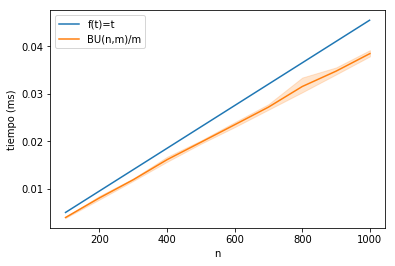

In [101]:
# Graficamos la función f(t) = t.
C = 0.000045;
df_lineal = pd.DataFrame({"x": [i for i in range(100, 1000)], "y": [i*C+0.0005 for i in range(100, 1000)]});

# Comparamos la función de tiempo de BU con una lineal.
df['BU/m'] = df['BU'] / df['m'];
ax1 = sns.lineplot(x="x", y="y", data=df_lineal);
ax1 = sns.lineplot(x="n", y="BU/m", data=df);
ax1.legend(["f(t)=t", "BU(n,m)/m"]);
plt.ylabel("tiempo (ms)");

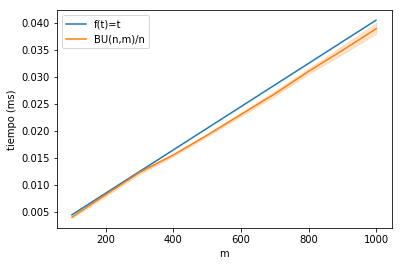

In [103]:
# Graficamos la función f(t) = t.
C = 0.00004;
df_lineal = pd.DataFrame({"x": [i for i in range(100, 1000)], "y": [i*C+0.0005 for i in range(100, 1000)]});

# Comparamos la función de tiempo de BU con una lineal.
df['BU/n'] = df['BU'] / df['n'];
ax1 = sns.lineplot(x="x", y="y", data=df_lineal);
ax1 = sns.lineplot(x="m", y="BU/n", data=df);
ax1.legend(["f(t)=t", "BU(n,m)/n"]);
plt.ylabel("tiempo (ms)");

### Diviendo funciones.
Una técnica distinta es dividir la función por la función de complejidad que creemos que la aproxima, si la aproximación es ajustada entonces la división debería dar una constante. Una ventaja es que no hay que aproximar con ninguna constante y no hay que ver a ojo.

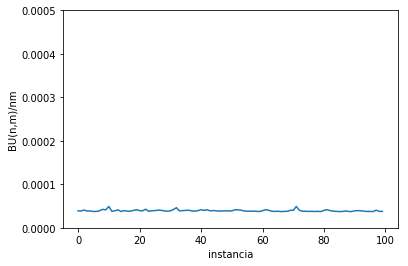

In [111]:
df['BU/nm'] = df['BU'] / (df['m'] * df['n']);

ax1 = sns.lineplot(x="instancia", y="BU/nm", data=df);
plt.ylim(0,0.0005);
plt.ylabel("BU(n,m)/nm");

Si la función la dividiamos por solo una variable o algo que no era su complejidad entonces no hubiese sido constante, por ejemplo.

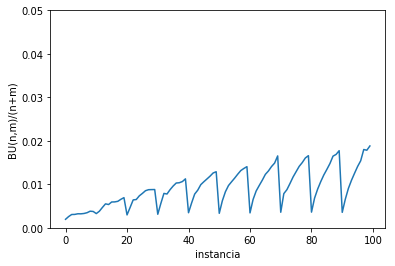

In [121]:
df['BU/n+m'] = df['BU'] / (df['m']+df['n']);

ax1 = sns.lineplot(x="instancia", y="BU/n+m", data=df);
plt.ylim(0,0.05);
plt.ylabel("BU(n,m)/(n+m)");